In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import collections as col
#Utilizando community detection de python-louvain
import community as com

In [2]:
hot_stuff = pd.read_csv("Hot Stuff.csv")

In [3]:
hot_stuff.head()

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,http://www.billboard.com/charts/hot-100/1958-0...,8/2/1958,1,Poor Little Fool,Ricky Nelson,Poor Little FoolRicky Nelson,1,NaN,1,1
1,http://www.billboard.com/charts/hot-100/1995-1...,12/2/1995,1,One Sweet Day,Mariah Carey & Boyz II Men,One Sweet DayMariah Carey & Boyz II Men,1,NaN,1,1
2,http://www.billboard.com/charts/hot-100/1997-1...,10/11/1997,1,Candle In The Wind 1997/Something About The Wa...,Elton John,Candle In The Wind 1997/Something About The Wa...,1,NaN,1,1
3,http://www.billboard.com/charts/hot-100/2006-0...,7/1/2006,1,Do I Make You Proud,Taylor Hicks,Do I Make You ProudTaylor Hicks,1,NaN,1,1
4,http://www.billboard.com/charts/hot-100/2009-1...,10/24/2009,1,3,Britney Spears,3Britney Spears,1,NaN,1,1


In [4]:
# new data frame with split value columns 
new = hot_stuff["Performer"].str.split(" & ", n = 1, expand = True) 
  
# making separate first name column from new data frame 
hot_stuff["Performer_1"]= new[0] 
  
# making separate last name column from new data frame 
hot_stuff["Performer_2"]= new[1] 
  
# Dropping old Name columns 
hot_stuff.drop(columns =["Performer"], inplace = True) 
  
# df display 
hot_stuff

,url,WeekID,Week Position,Song,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,Performer_1,Performer_2
0,http://www.billboard.com/charts/hot-100/1958-0...,8/2/1958,1,Poor Little Fool,Poor Little FoolRicky Nelson,1,NaN,1,1,Ricky Nelson,None
1,http://www.billboard.com/charts/hot-100/1995-1...,12/2/1995,1,One Sweet Day,One Sweet DayMariah Carey & Boyz II Men,1,NaN,1,1,Mariah Carey,Boyz II Men
2,http://www.billboard.com/charts/hot-100/1997-1...,10/11/1997,1,Candle In The Wind 1997/Something About The Wa...,Candle In The Wind 1997/Something About The Wa...,1,NaN,1,1,Elton John,None
3,http://www.billboard.com/charts/hot-100/2006-0...,7/1/2006,1,Do I Make You Proud,Do I Make You ProudTaylor Hicks,1,NaN,1,1,Taylor Hicks,None
4,http://www.billboard.com/charts/hot-100/2009-1...,10/24/2009,1,3,3Britney Spears,1,NaN,1,1,Britney Spears,None
...,...,...,...,...,...,...,...,...,...,...,...
320490,https://www.billboard.com/charts/hot-100/2019-...,1/5/2019,8,Jingle Bell Rock,Jingle Bell RockBobby Helms,7,13.0,8,25,Bobby Helms,None
320491,https://www.billboard.com/charts/hot-100/2019-...,12/7/2019,47,Jingle Bell Rock,Jingle Bell RockBobby Helms,8,NaN,47,26,Bobby Helms,None
320492,https://www.billboard.com/charts/hot-100/2019-...,12/14/2019,23,Jingle Bell Rock,Jingle Bell RockBobby Helms,8,47.0,23,27,Bobby Helms,None
320493,https://www.billboard.com/charts/hot-100/2019-...,12/21/2019,15,Jingle Bell Rock,Jingle Bell RockBobby Helms,8,23.0,15,28,Bobby Helms,None


In [5]:
indexNames = hot_stuff[ hot_stuff['Performer_2'] == None ].index
hot_stuff.drop(indexNames , inplace=True)
hot_stuff

KeyError: 'Performer_2'

In [6]:
hot_stuff = hot_stuff.fillna(value=np.nan)

In [7]:
hot_stuff_1 = hot_stuff[['Performer_1', 'Performer_2', 'Song']].groupby(['Performer_1', 'Performer_2']).agg(['count'])

In [8]:
hot_stuff_1

,,Song
,,count
Performer_1,Performer_2,
'N Sync,Gloria Estefan,20
2 Chainz,Wiz Khalifa,7
2 Chainz Featuring Drake,Lil Wayne,1
"2 Chainz Featuring Ty Dolla $ign, Trey Songz",Jhene Aiko,20
2 Chainz Featuring YG,Offset,2
...,...,...
for KING,COUNTRY,1
will.i.am,Britney Spears,24


In [7]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [8]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="33eca6309d3344028987abab11e234bc",
                                                           client_secret="25f6177ad5db47b687266bfdd2e990e2"))

In [9]:
result = sp.search("Queen",type="artist", limit=1)
result

{'artists': {'href': 'https://api.spotify.com/v1/search?query=Queen&type=artist&offset=0&limit=1',
  'items': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1dfeR4HaWDbWqFHLkxsg1d'},
    'followers': {'href': None, 'total': 31350978},
    'genres': ['classic rock', 'glam rock', 'rock'],
    'href': 'https://api.spotify.com/v1/artists/1dfeR4HaWDbWqFHLkxsg1d',
    'id': '1dfeR4HaWDbWqFHLkxsg1d',
    'images': [{'height': 806,
      'url': 'https://i.scdn.co/image/b040846ceba13c3e9c125d68389491094e7f2982',
      'width': 999},
     {'height': 516,
      'url': 'https://i.scdn.co/image/af2b8e57f6d7b5d43a616bd1e27ba552cd8bfd42',
      'width': 640},
     {'height': 161,
      'url': 'https://i.scdn.co/image/c06971e9ff81696699b829484e3be165f4e64368',
      'width': 200},
     {'height': 52,
      'url': 'https://i.scdn.co/image/6dd0ffd270903d1884edf9058c49f58b03db893d',
      'width': 64}],
    'name': 'Queen',
    'popularity': 89,
    'type': 'artist',
    'uri': 'spotify:

In [6]:
import requests
import spotipy.util as sputil
import json

In [10]:
SEARCH_PLAYLIST_ENDPOINT ='https://api.spotify.com/v1/search?type=playlist'

def search_playlist(name):
    path = 'token.json'
    with open(path) as t:
        token = json.load(t)
    myparams = {'type': 'playlilst'}
    myparams['q'] = name
    resp = requests.get(SEARCH_PLAYLIST_ENDPOINT, params=myparams, headers={"Authorization": "Bearer {}".format(token)})
    pprint (resp.json())
    return resp.json()


def query_playlist(playlist):

    path = 'token.json'
    with open(path) as t:
        token = json.load(t)

    sp = spotipy.Spotify(auth=token)

    data = search_playlist(playlist)
    # get playlists
    playlists = data['playlists']['items']

    for playlist in playlists:
        uri = playlist['uri']
        username = uri.split(':')[2]
        playlist_id = uri.split(':')[4]
        # query playlists
        results = sp.user_playlist(username, playlist_id)
        # separate data by track
        tracks = results['tracks']           
        # lookup       
        for item in tracks['items']:
            track = item['track']
            artist = track['artists'][0]['name']
            print(artist)




In [11]:
print(query_playlist('rock and roll'))

FileNotFoundError: [Errno 2] No such file or directory: 'token.json'

In [12]:
spotychart = pd.read_csv("regional-global-weekly-latest.csv")

In [13]:
spotychart

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Note that these figures are generated using a formula that protects against any artificial inflation of chart positions.,Unnamed: 4
0,Position,Track Name,Artist,Streams,URL
1,1,Dakiti,Bad Bunny,47686643,https://open.spotify.com/track/47EiUVwUp4C9fGc...
2,2,Dynamite,BTS,33452450,https://open.spotify.com/track/4saklk6nie3yiGe...
3,3,positions,Ariana Grande,32475331,https://open.spotify.com/track/35mvY5S1H3J2QZy...
4,4,Life Goes On,BTS,32174731,https://open.spotify.com/track/249gnXrbfmV8NG6...
...,...,...,...,...,...
196,196,You Got It,Vedo,4907925,https://open.spotify.com/track/4lsHZ92XCFOQfzJ...
197,197,Quiéreme Mientras Se Pueda,Manuel Turizo,4899440,https://open.spotify.com/track/34LI7rwi9H8w2S5...
198,198,Driving Home for Christmas - 2019 Remaster,Chris Rea,4888194,https://open.spotify.com/track/27qAMKrDdKEs8HD...
199,199,Say So,Doja Cat,4886071,https://open.spotify.com/track/3Dv1eDb0MEgF93G...


In [26]:
a = sp.search("Dakiti",type="track", limit=1)['tracks']['items'][0]['artists']
for i in a:
    print(i['name'])

Bad Bunny
Jhay Cortez


In [14]:
result = sp.search("Dakiti",type="track", limit=1)
artists = result["tracks"]["items"][0]["artists"]
artists

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/4q3ewBCX7sLwd24euuV69X'},
  'href': 'https://api.spotify.com/v1/artists/4q3ewBCX7sLwd24euuV69X',
  'id': '4q3ewBCX7sLwd24euuV69X',
  'name': 'Bad Bunny',
  'type': 'artist',
  'uri': 'spotify:artist:4q3ewBCX7sLwd24euuV69X'},
 {'external_urls': {'spotify': 'https://open.spotify.com/artist/0EFisYRi20PTADoJrifHrz'},
  'href': 'https://api.spotify.com/v1/artists/0EFisYRi20PTADoJrifHrz',
  'id': '0EFisYRi20PTADoJrifHrz',
  'name': 'Jhay Cortez',
  'type': 'artist',
  'uri': 'spotify:artist:0EFisYRi20PTADoJrifHrz'}]

In [30]:
G = nx.Graph()

In [31]:
index = 0
while index < len(artists) -1:
    indexb = index+1
    while indexb < len(artists):
        G.add_edge(artists[index]["name"], artists[indexb]["name"])
        indexb+=1
    index+=1
    

C:\Users\Alberto\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


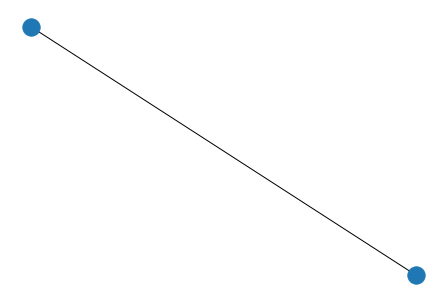

In [32]:
nx.draw(G)
plt.show()

In [33]:
import matplotlib

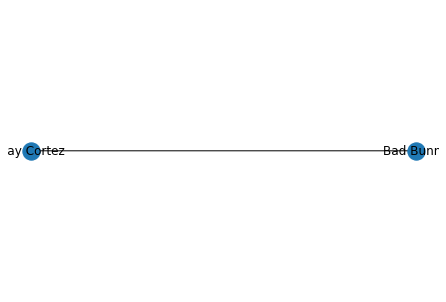

In [34]:
nx.draw_kamada_kawai(G,with_labels=True)

In [35]:
for index, row in spotychart.iterrows():
    result = sp.search(row["Unnamed: 1"],type="track", limit=1)
    if len(result["tracks"]["items"]) > 0:
        artists = result["tracks"]["items"][0]["artists"]
        index = 0
        while index < len(artists) -1:
            indexb = index+1
            while indexb < len(artists):
                G.add_edge(artists[index]["name"], artists[indexb]["name"])
                indexb+=1
            index+=1
    

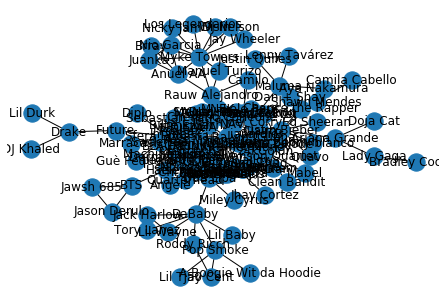

In [65]:
nx.draw_kamada_kawai(G,with_labels=True)

In [44]:
nx.write_gexf(G,"regional_global_weekly.gexf")

In [45]:
sorted(G.degree, key=lambda x: x[1], reverse=True)

[('J Balvin', 14),
 ('Myke Towers', 11),
 ('Justin Bieber', 10),
 ('DaBaby', 7),
 ('Dua Lipa', 6),
 ('Pop Smoke', 6),
 ('24kGoldn', 5),
 ('Rauw Alejandro', 5),
 ('Anuel AA', 5),
 ('Sfera Ebbasta', 5),
 ('Bad Bunny', 4),
 ('Maluma', 4),
 ('Sech', 4),
 ('Daddy Yankee', 4),
 ('ROSALÍA', 4),
 ('Farruko', 4),
 ('Nio Garcia', 4),
 ('Brray', 4),
 ('Juanka', 4),
 ('iann dior', 3),
 ('Internet Money', 3),
 ('Gunna', 3),
 ('Don Toliver', 3),
 ('NAV', 3),
 ('Roddy Ricch', 3),
 ('Drake', 3),
 ('Tainy', 3),
 ('Ozuna', 3),
 ('Juice WRLD', 3),
 ('Ariana Grande', 3),
 ('Jack Harlow', 3),
 ('Tory Lanez', 3),
 ('Lil Wayne', 3),
 ('BTS', 3),
 ('Shawn Mendes', 2),
 ('The Weeknd', 2),
 ('Lil Baby', 2),
 ('Manuel Turizo', 2),
 ('Guaynaa', 2),
 ('Jay Wheeler', 2),
 ('DJ Nelson', 2),
 ('Wisin', 2),
 ('Los Legendarios', 2),
 ('Lenny Tavárez', 2),
 ('Justin Quiles', 2),
 ('Chencho Corleone', 2),
 ('Jawsh 685', 2),
 ('Jason Derulo', 2),
 ('Marshmello', 2),
 ('Post Malone', 2),
 ('Camilo', 2),
 ('Lady Gaga', 2),


In [37]:
hot_stuff = pd.read_csv("Hot Stuff.csv")
G2 = nx.Graph()

In [38]:
for index, row in hot_stuff.iterrows():
    result = sp.search(row["Song"],type="track", limit=1)
    if len(result["tracks"]["items"]) > 0:
        artists = result["tracks"]["items"][0]["artists"]
        index = 0
        while index < len(artists) -1:
            indexb = index+1
            while indexb < len(artists):
                G2.add_edge(artists[index]["name"], artists[indexb]["name"])
                indexb+=1
            index+=1
    

KeyboardInterrupt: 

In [43]:
nx.write_gexf(G2,"billboard.gexf")

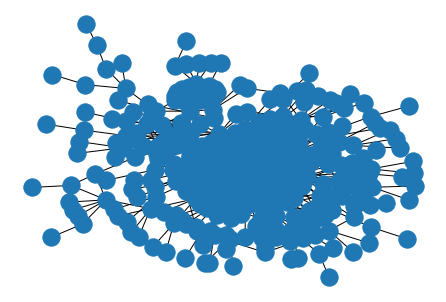

In [51]:
nx.draw_kamada_kawai(G2,with_labels=False)

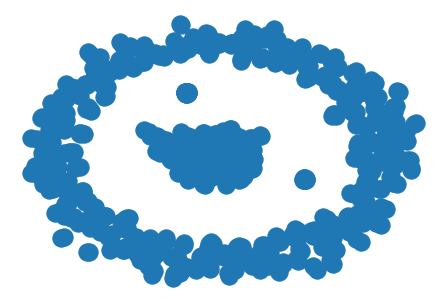

In [50]:
nx.draw(G2)
plt.show()

In [55]:
len(G2.nodes())

869

In [39]:
deg = G2.degree(G2.nodes())
deg

DegreeView({'Mariah Carey': 9, 'Boyz II Men': 1, 'Katy Perry': 6, 'Snoop Dogg': 20, 'Ariana Grande': 13, 'Social House': 2, 'Major Lazer': 4, 'Justin Bieber': 21, 'MØ': 3, 'DaBaby': 9, 'Roddy Ricch': 8, 'Post Malone': 17, 'Ty Dolla $ign': 32, 'Shawn Mendes': 3, 'Camila Cabello': 26, 'Maroon 5': 4, 'Wiz Khalifa': 22, 'Iggy Azalea': 4, 'Future': 31, 'Travis Scott': 30, 'Skip Marley': 1, 'Dan + Shay': 1, 'T.I.': 18, 'Kanye West': 39, 'Lil Wayne': 52, 'Brett Eldredge': 1, 'Meghan Trainor': 1, 'XXXTENTACION': 15, 'Cardi B': 18, 'Bruno Mars': 3, 'Pusha T': 2, 'Drake': 42, 'Jessie J': 3, 'Nicki Minaj': 46, 'Kesha': 6, '3OH!3': 2, 'B.o.B': 5, 'The Weeknd': 15, 'Kendrick Lamar': 15, 'BTS': 2, 'Halsey': 7, 'Ozzy Osbourne': 3, 'Cory Gunz': 1, 'Rihanna': 9, 'The Chainsmokers': 8, 'Quavo': 19, 'A Great Big World': 1, 'Christina Aguilera': 8, 'Vancouver Sleep Clinic': 1, 'GXNXVS': 1, 'Swae Lee': 16, 'League of Legends': 10, 'The Glitch Mob': 3, 'Mako': 4, 'The Word Alive': 3, 'Juice WRLD': 13, 'Youn

In [40]:
len(G2.edges())

3335

In [41]:
sorted(G2.degree, key=lambda x: x[1], reverse=True)

[('Lil Wayne', 52),
 ('Nicki Minaj', 46),
 ('Drake', 42),
 ('Kanye West', 39),
 ('Ty Dolla $ign', 32),
 ('Future', 31),
 ('Travis Scott', 30),
 ('Chris Brown', 30),
 ('Jennifer Lopez', 29),
 ('T-Pain', 28),
 ('Rick Ross', 27),
 ('Camila Cabello', 26),
 ('DJ Khaled', 26),
 ('Lin-Manuel Miranda', 26),
 ('Fat Joe', 26),
 ('Ludacris', 25),
 ('Akon', 25),
 ('Gloria Estefan', 23),
 ('Luis Fonsi', 23),
 ('Wiz Khalifa', 22),
 ('Big Sean', 22),
 ('Marc Anthony', 22),
 ('Pedro Capó', 22),
 ('Justin Bieber', 21),
 ('2 Chainz', 21),
 ('Alex Lacamoire', 21),
 ('Ana Villafañe', 21),
 ('Anthony Ramos', 21),
 ('Dessa', 21),
 ('Ednita Nazario', 21),
 ('Gilberto Santa Rosa', 21),
 ('Gina Rodriguez', 21),
 ('Joell Ortiz', 21),
 ('John Leguizamo', 21),
 ('Juan Luis Guerra 4.40', 21),
 ('Pj Sin Suela', 21),
 ('Rita Moreno', 21),
 ('Rubén Blades', 21),
 ('Tommy Torres', 21),
 ('Snoop Dogg', 20),
 ('Quavo', 19),
 ('Young Thug', 19),
 ('T.I.', 18),
 ('Cardi B', 18),
 ('Diddy', 18),
 ('Eminem', 18),
 ('Meek Mi

In [66]:
sorted(G.degree, key=lambda x: x[1], reverse=True)

[('J Balvin', 14),
 ('Myke Towers', 11),
 ('Justin Bieber', 10),
 ('DaBaby', 7),
 ('Dua Lipa', 6),
 ('Pop Smoke', 6),
 ('24kGoldn', 5),
 ('Rauw Alejandro', 5),
 ('Anuel AA', 5),
 ('Sfera Ebbasta', 5),
 ('Bad Bunny', 4),
 ('Maluma', 4),
 ('Sech', 4),
 ('Daddy Yankee', 4),
 ('ROSALÍA', 4),
 ('Farruko', 4),
 ('Nio Garcia', 4),
 ('Brray', 4),
 ('Juanka', 4),
 ('iann dior', 3),
 ('Internet Money', 3),
 ('Gunna', 3),
 ('Don Toliver', 3),
 ('NAV', 3),
 ('Roddy Ricch', 3),
 ('Drake', 3),
 ('Tainy', 3),
 ('Ozuna', 3),
 ('Juice WRLD', 3),
 ('Ariana Grande', 3),
 ('Jack Harlow', 3),
 ('Tory Lanez', 3),
 ('Lil Wayne', 3),
 ('BTS', 3),
 ('Shawn Mendes', 2),
 ('The Weeknd', 2),
 ('Lil Baby', 2),
 ('Manuel Turizo', 2),
 ('Guaynaa', 2),
 ('Jay Wheeler', 2),
 ('DJ Nelson', 2),
 ('Wisin', 2),
 ('Los Legendarios', 2),
 ('Lenny Tavárez', 2),
 ('Justin Quiles', 2),
 ('Chencho Corleone', 2),
 ('Jawsh 685', 2),
 ('Jason Derulo', 2),
 ('Marshmello', 2),
 ('Post Malone', 2),
 ('Camilo', 2),
 ('Lady Gaga', 2),
